# Exercises and Homework for week 3

## physics725: Scientific Programming with Python (SS 2023)

Oliver Cordes & Thomas Erben

---

Homework is due on **Thursday, 04/05/2023, 11:55pm**

 * You only learn a programming language by actively praticing and using it! We therefore **strongly** advise you to work on the homework problems.
 * Please discuss the problems with your student peers and with your tutor.
 * Your code(s) need(s) to be well and appropriately commented!
 * Submit this notebook and, if necessary, additional files in a `tar`-archive with name `Homework_3_group_XX.tgz` (replace `XX` with your group number) to your tutor.

**Topics of this exercise:**
 * First contact with `numpy`-arrays
 * Basic plots with matplotliba

**Your group number here please:**  Group XX

## 1. Lecture Review (0 points)

If you did the lecture review questions [05_Review_questions.ipynb](05_Review_questions.ipynb) (strongly recommended!): 
Please discuss with your tutor and your group any issues/problems you had with them.

---

## 2. Numerical Integration (15 points)

We want to estimate the integral:

$$\int_1^2 \frac{1}{x}{\rm d} x = \log 2 \approx 0.693147 $$

For the calculation we want to compare different mathematical methods. Be $f(x)$ a continuous function on the interval $I=[a;b]$. Be $x_i$ with $a < x_0 < \dots < x_n < b$ a decomposition of the interval $I$. The integral area below the function can be divided into a finite number of small areas $A_i$. The sum of these areas approximates the integral:
$$ \int_a^bf(x)\,{\rm d}x\approx \sum_{i=0}^{n-1} A_i$$

These numerical approximations can be reduced in the way how the small areas are calculated:
1. The simplest approximation is the use of the Riemann sums. The area below the function $f$ will be described by a series of rectangles. One rectangle between $x_i$ and $x_{i+1}$ can be calculated with:
    $$A_i = (x_{i+1}-x_i) \cdot f\left(\frac{x_i+x_{i+1}}2\right)$$
2. Instead of a rectangle one can also define a trapezium:
    $$A_i = (x_{i+1}-x_i) \cdot \left( \frac{f(x_i)+f(x_{i+1})}{2} \right)$$
3. A further approximation is the Simpsons method in which the part below the function is approximated by a parabel. The area can be calculated by:
    $$A_i = (x_{i+1}-x_i)\cdot \frac{1}{6} \left( f(x_i) + 4\cdot f\left(\frac{x_i+x_{i+1}}2\right) + f(x_{i+1}) \right)$$
    
    
To illustrate the different approximations, the small areas for each method are drawn for the $f(x)=\frac{1}{x}$ function:
<table>
<tr>
    <td>
        <img src="figs/riemann.png">
    </td>
    <td>
        <img src="figs/trapez.png">
    </td>
    <td>
        <img src="figs/simpson.png">
    </td>
</tr>
</table>
    
**Your tasks:**

 Implement each of the approximation for the given integral with numpy arrays and compare the results. Which method gives the best value in comparison to the exact value of $\log 2$ (use a print command for your decision!)?  You can assume a separation of the intervall $I=[a;b]$ in $n=50$ equally spaced parts. 
 
**Hints:**

For the calculation of the function values $f(x)$ we pre defined a simple function which you can use. You can use this function with ```y=f(x)```. ```x``` can be a float or integer variable or a numpy-array!

In [ ]:
import numpy as np

def f(x):
    """The simple function that returns 1/x."""
    return 1/x

# Your solution here please

In [ ]:
## SOLUTION

import numpy as np

def f(x):
    """The simple function that returns 1/x."""
    return 1/x

# Define the interval.
a = 1
b = 2
n = 50
x = np.linspace(a, b, n)

# You can always use the same distance.
h = x[1] - x[0]

# the exact value
int_exact = np.log(2)

# Riemann sums
A = h * f((x[1:]+x[:-1])/2)
int_riemann = np.sum(A)
print(f'Riemann sum approx: {np.abs(int_exact-int_riemann)}')

# Trapezium
A = h * (f(x[1:])+f(x[:-1]))/2
int_trapezium = np.sum(A)
print(f'Trapezium sum approx: {np.abs(int_exact-int_trapezium)}')


# Simpsons method
A = h * (1/6) * (f(x[:-1]) + 4*f((x[1:]+x[:-1])/2) + f(x[1:]))
int_simpsons = np.sum(A)
print(f'Simpsons sum approx: {np.abs(int_exact-int_simpsons)}')


---

---

## 3. Traps while plottting

Somebody wants to plot the function $f(x) = \frac{\sin(30x)}x$ with $x\in [1,10]$. The submitted code looks like:

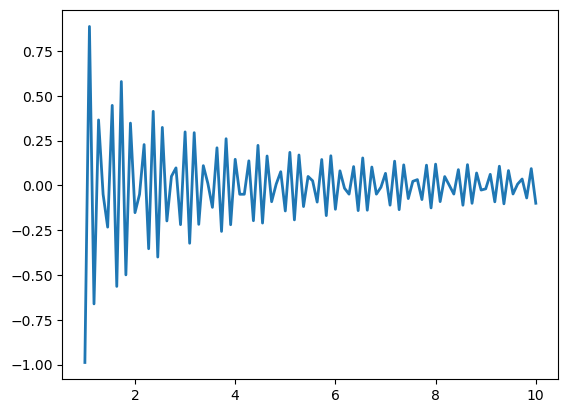

In [15]:
%matplotlib inline

import numpy as np
import matplotlib.pyplot as plt

x = np.linspace(1, 10, 100)
y = np.sin(30. * x) / x

fig, ax = plt.subplots()

ax.plot(x, y, linewidth=2.0)

Obviously the result was not really wanted. *What's wrong with the code?*

A lecturer creates this plot to demonstrate a better solution:

<img src="figs/trapsplotting.png" style="width:50%"/>

**Tasks**:

Recreate the plot which includes the faulty (blue plot) and corrected code (red plot) for the function $f(x) = \frac{\sin(30x)}x$ with $x\in [1,10]$. The corrected plot is shifted by `+2` on the y-axis. Please create also the legend box and all labels. Write the reason why the original code is not correct as a comment into the code.

In [ ]:
# Your solution here please

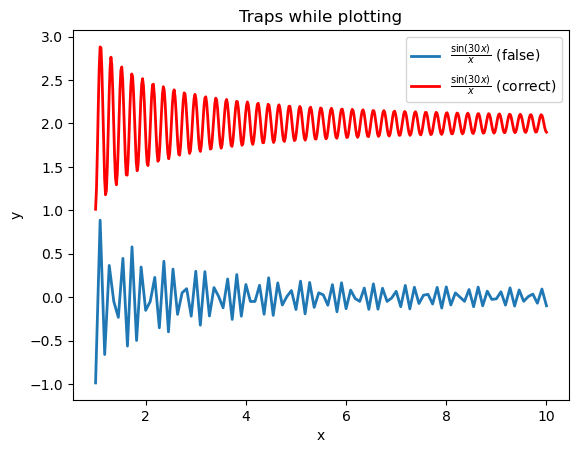

In [13]:
## SOLUTION

%matplotlib inline

import numpy as np
import matplotlib.pyplot as plt

x_w = np.linspace(1, 10, 100)
y_w = np.sin(30. * x_w) / x_w

# the original code produces a faulty code, because
# it has to few points to plot -> Sampling theorem
# 500 points gives a good sampling for this plot

x_c = np.linspace(1, 10, 500)   # better
y_c = np.sin(30. * x_c) / x_c


fig, ax = plt.subplots()

ax.plot(x_w, y_w, linewidth=2.0, label=r"$\frac{\sin(30x)}{x}$ (false)")
ax.plot(x_c, y_c+2, linewidth=2.0, color='red', label=r"$\frac{\sin(30x)}{x}$ (correct)")
ax.set_xlabel('x')
ax.set_ylabel('y')
ax.set_title('Traps while plotting')
ax.legend(loc='upper right')
#plt.savefig('trapsplotting.png')

---

## 3. Task 8 of Project Euler

[Project Euler](https://projecteuler.net) is a great source for programming tasks at all levels. Please solve [problem 8](https://projecteuler.net/problem=8) which is a great application for operations with the Python string type.

**Hint:** 
 The second `String access`-task of the *Review questions notebook* this week shows you how to calculates the crosssum of an integer number. For this problem, a similar code-block to obtain the  `cross_product` of an integer will come in very handy.

In [ ]:
# your solution here

# The variable 'number' below contains the 1000-digit
# number of the Euler-problem as a string

number = """
73167176531330624919225119674426574742355349194934
96983520312774506326239578318016984801869478851843
85861560789112949495459501737958331952853208805511
12540698747158523863050715693290963295227443043557
66896648950445244523161731856403098711121722383113
62229893423380308135336276614282806444486645238749
30358907296290491560440772390713810515859307960866
70172427121883998797908792274921901699720888093776
65727333001053367881220235421809751254540594752243
52584907711670556013604839586446706324415722155397
53697817977846174064955149290862569321978468622482
83972241375657056057490261407972968652414535100474
82166370484403199890008895243450658541227588666881
16427171479924442928230863465674813919123162824586
17866458359124566529476545682848912883142607690042
24219022671055626321111109370544217506941658960408
07198403850962455444362981230987879927244284909188
84580156166097919133875499200524063689912560717606
05886116467109405077541002256983155200055935729725
71636269561882670428252483600823257530420752963450
"""

In [22]:
## SOLUTION

number = "73167176531330624919225119674426574742355349194934\
96983520312774506326239578318016984801869478851843\
85861560789112949495459501737958331952853208805511\
12540698747158523863050715693290963295227443043557\
66896648950445244523161731856403098711121722383113\
62229893423380308135336276614282806444486645238749\
30358907296290491560440772390713810515859307960866\
70172427121883998797908792274921901699720888093776\
65727333001053367881220235421809751254540594752243\
52584907711670556013604839586446706324415722155397\
53697817977846174064955149290862569321978468622482\
83972241375657056057490261407972968652414535100474\
82166370484403199890008895243450658541227588666881\
16427171479924442928230863465674813919123162824586\
17866458359124566529476545682848912883142607690042\
24219022671055626321111109370544217506941658960408\
07198403850962455444362981230987879927244284909188\
84580156166097919133875499200524063689912560717606\
05886116467109405077541002256983155200055935729725\
71636269561882670428252483600823257530420752963450"


# Calculate maximum product of 13 digits in the big number

# We scan digit by digit throuzh the number string and test
# the value of the product of the thirteen following digits:
ndigit = 13
maxProduct = 0
position = -1

# walk through all numbers
i = 0

while i < len(number)-ndigit:
    # define the cross_product
    product = 1
    #s = str(int(number[i:i+ndigit]))
    s = number[i:i+ndigit]
    for letter in s:
        num = int(letter)
        product = product * num
    
    
    if product > maxProduct:
        maxProduct = product
        position = i
    i += 1

print(f'The last number tested is {number[i:i+ndigit]}')
print(f'Maximum product is {maxProduct} at position {position}')
print(f'The digits for the maximum product are: {number[position:position + ndigit]}')

The last number tested is 0420752963450
Maximum product is 23514624000 at position 197
The digits for the maximum product are: 5576689664895
